## Supervised Learning Project - VGK

### Problem Definition & Details

#### Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in  the earlier campaign.


#### Domain:
Banking


#### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

#### Attribute Information:
- ID : Customer ID
- Age : Customer's age in completed years
- Experience : #years of professional experience
- Income : Annual income of the customer(USD 000)
- ZIP Code : Home Address ZIP code.
- Family : Family size of the customer
- CCAvg : Avg. spending on credit cards per month(USD 000)
- Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage : Value of house mortgage if any.(USD 000)
- Personal Loan : Did this customer accept the personal loan offered in the last campaign?
- Securities Account : Does the customer have a securities account with the bank?
- CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
- Online : Does the customer use internet banking facilities?
- Credit card : Does the customer use a credit card issued by UniversalBank?
 
#### Learning Outcomes:
- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using a classification model
- Model evaluation

#### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

#### Ref ::
https://activewizards.com/blog/top-9-data-science-use-cases-in-banking/
https://thefinancialbrand.com/71350/ai-machine-learning-analytics-marketing-banking-trends/

In [72]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Numerical libraries
import numpy as np

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Metrics
from sklearn import metrics

In [73]:
# reading the CSV file into pandas dataframe
bpl_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [74]:
# Check top few records to get a feel of the data structure
bpl_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


# 1. Read the column description and ensure you understand each attribute well

- ID : Customer ID
  - ID is totally consequtive.. Maybe its from DB where it was an auto incremented field. We have data of the first 5000 customers. Now, we dont know the num of years over which these customers were accumulated..
  - Anyway this may not be relevant unless we have info on when the account was opened and we consider another data set for economic parameters in that year.
- Age : Customer's age in completed years
  - Ranges from 23 ~ 67.. Reasonably fair representation of each age and decade.. Need to check further on how many data point in each decade -- MAy have impact on personal loan
- Experience : #years of professional experience
  - There are 50 rows with -1, -2, -3 years of experience. I expected years of experience to be positive. What does -1 years of experience mean ? Unpaid Intern ? or PHD candidate on stipend ? Maybe this is a mistyped information and needs to converted to positive? -- MAy have impact on personal loan
- Income : Annual income of the customer(USD 000)
  - Big range here 8K ~ 224K -- MAy have impact on personal loan
- ZIP Code : Home Address ZIP code.
  - There is 1 wrong entry for zip code -- 9307.. If Zip does not matter to our analysis (we may not do clusters of location based income etc.) , it should be ok.
- Family : Family size of the customer
  - The bigger the family higher the expense.. -- MAy have impact on personal loan
- CCAvg : Avg. spending on credit cards per month(USD 000)
  - The person who spends more on credit card may be more likely to go for personal loan -- MAy have impact on personal loan
  - Casually looking it seems like distribution of people opting for personal loan is higher with higher CC spend
- Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
  - Seems to have slight corelation.. undergrads seem to be less probable for loans, graduate and post grad are equally opting for personal loan.. Maybe undergrads are living well within their means and hence dont need personal loan
- Mortgage : Value of house mortgage if any.(USD 000)
  - Direct corelation .. First burdened with EMI.. then no choice but to opt for personal loan.. 
  - mortgage 	ploan %
    0~100       325 / 3732
    100~200    39 / 766
    200~300    40 / 300
    300~400    38 / 126
    400~500    22 / 50
    500~600    14/22
    600+       2/4

- Personal Loan : Did this customer accept the personal loan offered in the last campaign?
  - honorable target column, Mr.dependent variable which bank people prefer to see set to 1 always and hence they setup outbound call centers to make calls to all non-DND registered numbers offering personal loan.
- Securities Account : Does the customer have a securities account with the bank?
  - Share trading account .. does not look like has any impact on personal loan
- CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
  - flag .. Looks like almost 40% of the people who have CD account take personal loan.. 140 / 302. which is pretty high .. strong corelation
- Online : Does the customer use internet banking facilities?
  - almost 3/5th of the customers have online account.. But does not look like it has strong connection to personal loan taking adventures.
- Credit card : Does the customer use a credit card issued by UniversalBank?
  - No relation to personal loan.. just a flag to indicate whether holding universal bank card. may not have corelation with target
  
#### General observations.. no null data.. all valid numeric and flags.. only 2 problem areas.. 
1. 1 record with probably incorrect zipcode
2. 52 records with negative experience num of years.. which probably will need to be converted to corresponding positive.

# 2. Study the data distribution in each attribute, share your findings

In [75]:
#5-point summary first raw data
bpl_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [76]:
#Normalize -ve experience to +ve .. surely a mistyped data
bpl_df_abs = bpl_df.abs()
bpl_df_abs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [77]:
#just check skew
bpl_df_abs.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.010038
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

#### Observations .. 
1. The skew of zipcode maybe be ignored.. 
2. Age, exp, wise there is slight skew towards right tail  indicating higher population in their later years

In [78]:
## Define X and y variables
X = bpl_df_abs.drop('Personal Loan', axis=1)
y = bpl_df_abs[['Personal Loan']]

In [79]:
#to check feature importance .. 
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
print(model.feature_importances_)
# ID	Age	Experience	Income	ZIP Code	Family	CCAvg	Education	Mortgage	Personal Loan	Securities Account	CD Account	Online	CreditCard


[0.03477548 0.04042221 0.03346525 0.36664778 0.0266839  0.08019662
 0.126075   0.13159104 0.0363687  0.0091757  0.07790318 0.01419003
 0.02250512]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [80]:
#remove unnecessary columns
# Age and experience are redundant.. We will retain only Experience.After all age is just a number.
bpl_df_abs = bpl_df_abs.drop(['Age','ID', 'ZIP Code'], axis=1)
bpl_df_abs.head(10)

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,49.0,4.0,1.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,19.0,34.0,3.0,1.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,15.0,11.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,100.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,45.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
5,13.0,29.0,4.0,0.4,2.0,155.0,0.0,0.0,0.0,1.0,0.0
6,27.0,72.0,2.0,1.5,2.0,0.0,0.0,0.0,0.0,1.0,0.0
7,24.0,22.0,1.0,0.3,3.0,0.0,0.0,0.0,0.0,0.0,1.0
8,10.0,81.0,3.0,0.6,2.0,104.0,0.0,0.0,0.0,1.0,0.0
9,9.0,180.0,1.0,8.9,3.0,0.0,1.0,0.0,0.0,0.0,0.0


Age plot

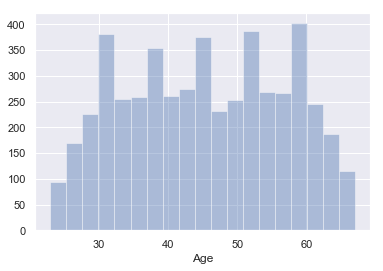

In [81]:
sns.set(color_codes=True)
sns.distplot(bpl_df['Age'], kde = False)

#### Observations .. Nothing much to not here.. its a reasonably flat distribution

Experience plot

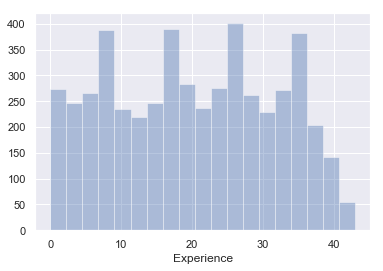

In [82]:
sns.set(color_codes=True)
sns.distplot(bpl_df_abs['Experience'], kde = False)

#### Observations .. Nothing much to not here.. its a reasonably flat distribution.. This variable might be same as age.. can we get rid of one?

income

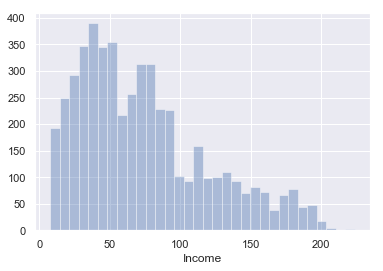

In [83]:
sns.set(color_codes=True)
sns.distplot(bpl_df_abs['Income'], kde = False)

#### Observations .. The data has more people in lower income range and relatively less people in high income range

family

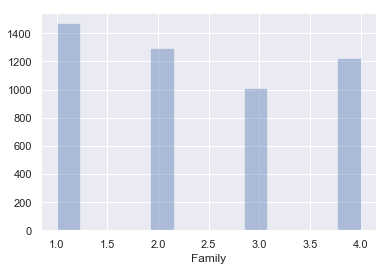

In [84]:
sns.set(color_codes=True)
sns.distplot(bpl_df_abs['Family'], kde = False)

#### Observations .. Fairly equal distribution of family members

ccavg

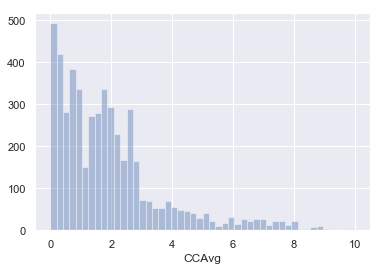

In [85]:
sns.set(color_codes=True)
sns.distplot(bpl_df_abs['CCAvg'], kde = False)

#### Observations .. Most of hte data is concentrated to average spending below 3 K. 

edu

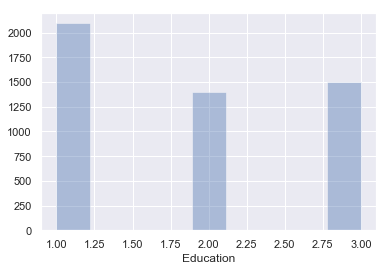

In [86]:
sns.set(color_codes=True)
sns.distplot(bpl_df_abs['Education'], kde = False)

#### Observations .. Fairly evenly distributed data.. its understandable that the number of people reduces as education level increases due to high cost of higher education these days.

mortgage

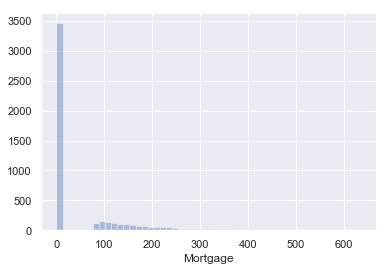

In [87]:
sns.set(color_codes=True)
sns.distplot(bpl_df_abs['Mortgage'], kde = False)

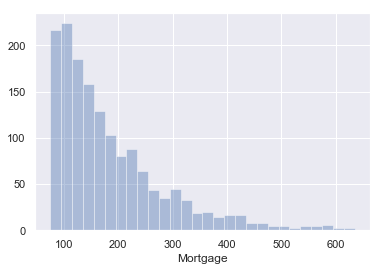

In [88]:
#exluding 0 mortgage
sns.distplot(bpl_df_abs[bpl_df_abs['Mortgage'] !=0]['Mortgage'], kde = False)

#### Observations .. WE see that most of the loans are concentrated in the 100 ~ 250 K range

securities

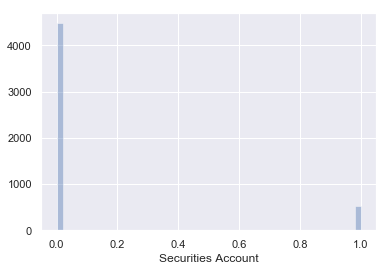

In [89]:
sns.set(color_codes=True)
sns.distplot(bpl_df_abs['Securities Account'], kde = False)

#### Observations .. Numberwise  security account seems to co-relate with target below.. but not necessarily the same records.. need to check further

cd account

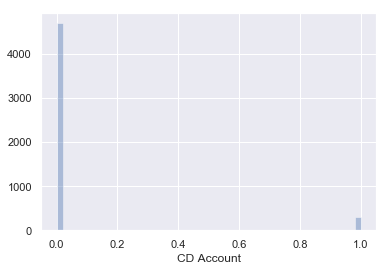

In [90]:
sns.set(color_codes=True)
sns.distplot(bpl_df_abs['CD Account'], kde = False)

#### Observations .. Very small number of people have the CD account

online account

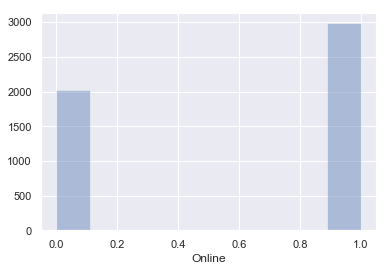

In [91]:
sns.set(color_codes=True)
sns.distplot(bpl_df_abs['Online'], kde = False)

#### Observations .. Large number of people have opted for online services.. Digital banking is a hit!

Credit card

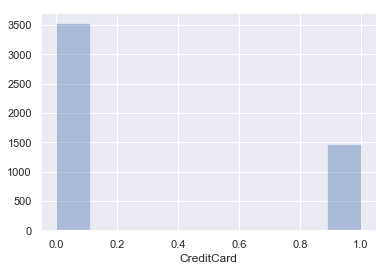

In [92]:
sns.set(color_codes=True)
sns.distplot(bpl_df_abs['CreditCard'], kde = False)

#### Observations .. only 1/3rd of the people own credit cards

# 3. Get the target column distribution. Your comments

Personal loan column

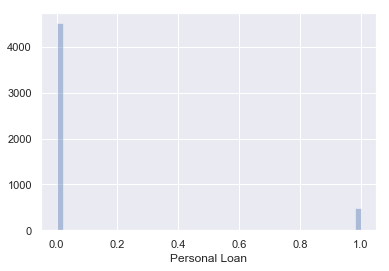

In [93]:
sns.set(color_codes=True)
sns.distplot(bpl_df_abs['Personal Loan'], kde = False)

In [94]:
perLoanCount = bpl_df_abs['Personal Loan'].value_counts(normalize=True)
print(perLoanCount)

0.0    0.904
1.0    0.096
Name: Personal Loan, dtype: float64


### Observation :: The data is heavily skewed towards personal loan = false, 90 %

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


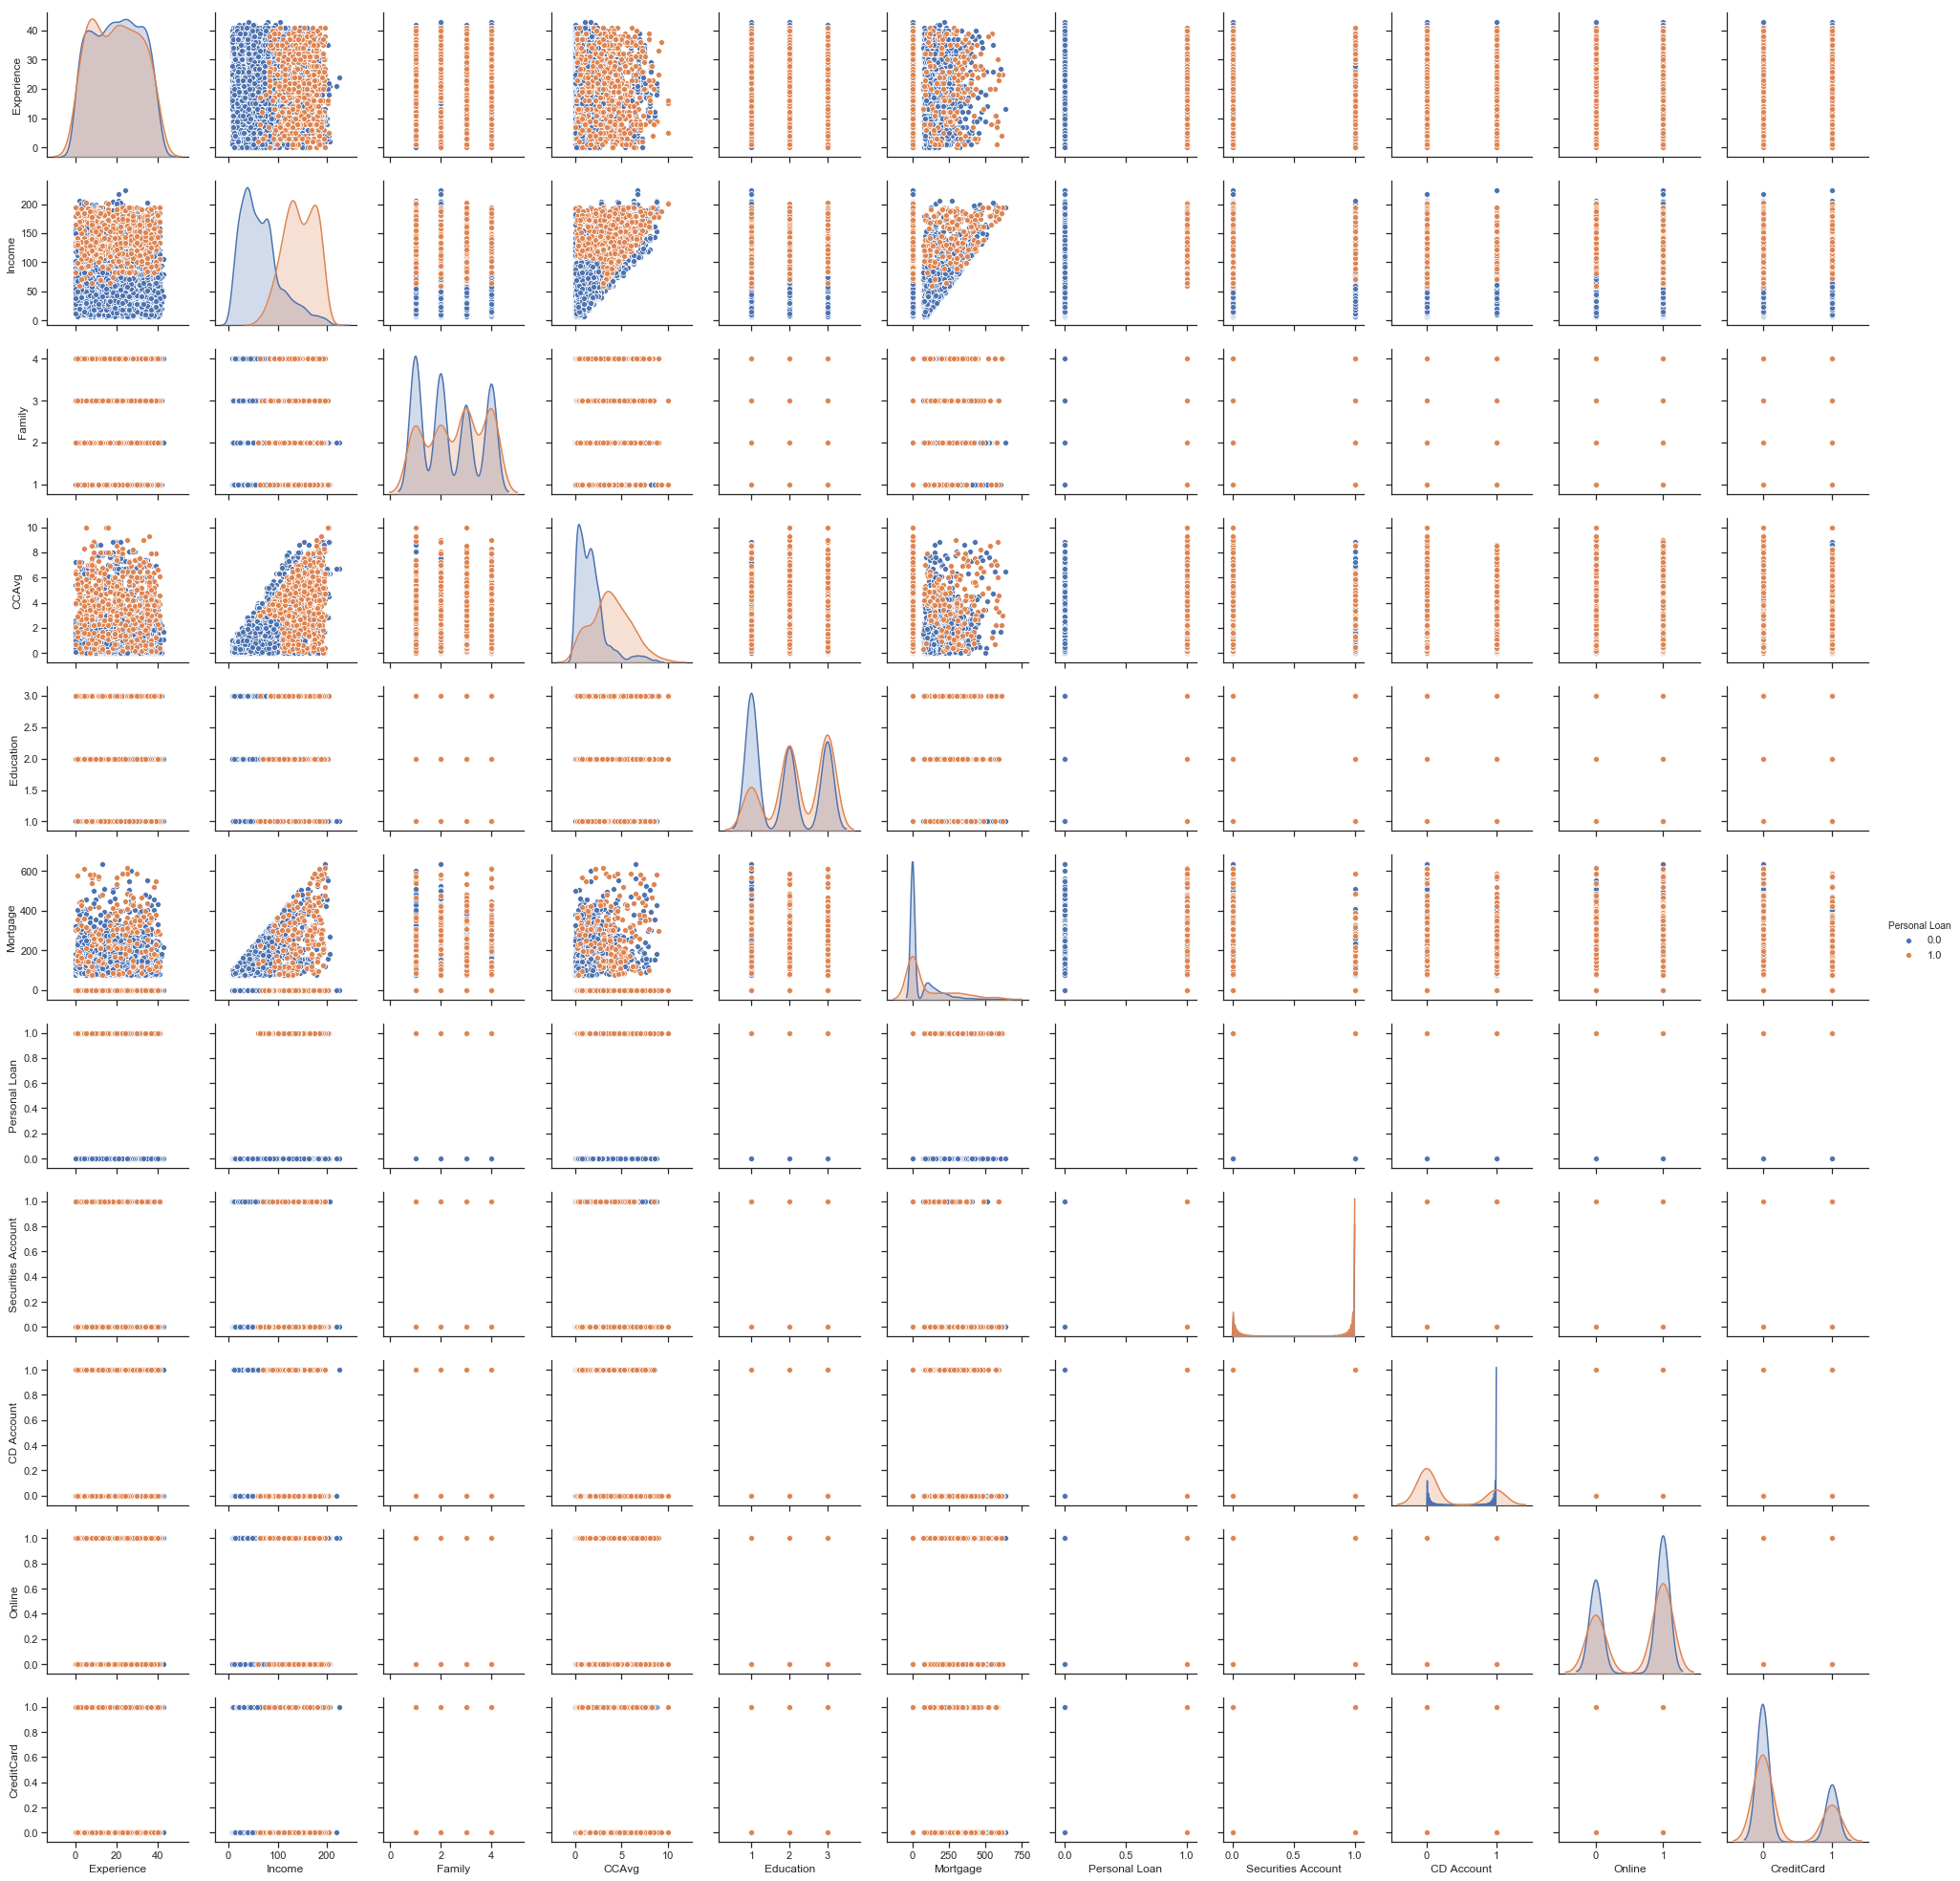

In [95]:
sns.set(style="ticks")
sns.pairplot(bpl_df_abs, hue='Personal Loan')

#### Observations .. 
The target variable seems to be well separated in the 
- Age & exp dont seem to be affecting personal loan rates
- INCOME higher hte income higher is rate of acceeptance
- Gradually increating with Family increase, 
- some corelation with CCAvg spending, 
- surprisingly Education (maybe school fees is so high they have to take loan to pay fees and then personal loan also .. its a debt trap), 
- Lower mortgages seem to have higher instances of personal loans.. or is it due to higher concentration of mortgage in lower bracket?
- Not able to understand why securities account indicates only personal loan, maybe some bug in snsplot
- not having a cd account seems to be having an effect on personal loan acceptance rates
- Online and CC dont seem to have impact on whether a person takes loan or not

# 4. Split the data into training and test set in the ratio of 70:30 respectively

In [96]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

## 5A. Logistic

In [97]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train.values.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

## 6A. Confusion Matrix for Logistic Regression

In [98]:
#Predict for train set
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[2839  330]
 [  35  296]]


In [99]:
logreg.score(X_train,y_train)

0.8957142857142857

In [100]:
#Predict for test set
pred_test = logreg.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[1213  138]
 [  21  128]]


In [101]:
logreg.score(X_test,y_test)

0.894

In [102]:
print("Logistic Regression Metrics = \n", metrics.classification_report(y_test, pred_test))

Logistic Regression Metrics = 
               precision    recall  f1-score   support

         0.0       0.98      0.90      0.94      1351
         1.0       0.48      0.86      0.62       149

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.73      0.88      0.78      1500
weighted avg       0.93      0.89      0.91      1500



In [103]:
# feature selection from -- https://machinelearningmastery.com/feature-selection-machine-learning-python/
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 3)
fit = rfe.fit(X, y.values.ravel())
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:",fit.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Num Features: 3
Selected Features: [False False False False False False False False False  True  True False
  True]
Feature Ranking: [10  6  7  8 11  5  3  2  9  1  1  4  1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

#### Some thoughts :: Looks like Securities Account	CD Account	Online	CreditCard are most important features.. ??

## 5B. K-NN

In [104]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5, weights = 'distance')
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train.values.ravel())
pred_train = NNH.predict(X_train)
mat_train = confusion_matrix(y_train,pred_train)


In [105]:
NNH.score(X_train, y_train)

1.0

In [106]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

pred_test = NNH.predict(X_test)

In [107]:
NNH.score(X_test, y_test)

0.9

## 6B. Confusion Matrix for K-NN

In [108]:
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[3169    0]
 [   0  331]]


In [109]:
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[1344    7]
 [ 143    6]]


In [110]:
print("KNN Metrics = \n", metrics.classification_report(y_test, pred_test))

KNN Metrics = 
               precision    recall  f1-score   support

         0.0       0.90      0.99      0.95      1351
         1.0       0.46      0.04      0.07       149

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.68      0.52      0.51      1500
weighted avg       0.86      0.90      0.86      1500



## 5C. Naïve Bayes

In [111]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train.values.ravel())
pred_train = clf.predict(X_train)

In [112]:
clf.score(X_train, y_train)

0.8948571428571429

In [113]:
pred_test = clf.predict(X_test)
clf.score(X_test, y_test)

0.8826666666666667

## 6C. Confusion matrix for Naive Bayes

In [114]:
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[2932  237]
 [ 131  200]]


In [115]:
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[1239  112]
 [  64   85]]


In [116]:
print("NAIVE BAYES Metrics = \n", metrics.classification_report(y_test, pred_test))

NAIVE BAYES Metrics = 
               precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      1351
         1.0       0.43      0.57      0.49       149

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



## 5D. SVM

In [117]:
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3)
clf.fit(X_train,y_train.values.ravel())
pred_train = clf.predict(X_train)

In [118]:
clf.score(X_train, y_train)

1.0

In [119]:
pred_test = clf.predict(X_test)
clf.score(X_test, y_test)

0.9006666666666666

## 6D. Confusion matrix for SVM

In [120]:
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[3169    0]
 [   0  331]]


In [121]:
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[1351    0]
 [ 149    0]]


In [122]:
print("SVM Metrics = \n", metrics.classification_report(y_test, pred_test))

SVM Metrics = 
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1351
         1.0       0.00      0.00      0.00       149

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 7. Give your reasoning on which is the best model in this case and why it performs better?

| Model Name         | Training Accuracy | Testing Accuracy | precision   | recall      | f1 Score    | support    |
| ------------------ | ----------------- | ---------------- | ----------- | ----------- | ----------- | ---------- |
| Logistic Regrsion  | 0.8991            | 0.8926           |0.48         |0.86         |0.61         |149         |
| KNN                | 1.0               | 0.9093           |0.57         | 0.38        |0.45         | 149        |
| Naive Bayes        | 0.8897            | 0.8753           |0.41         |0.57         |0.48         |149         |
| SVM                | 0.9891            | 0.9326           |0.88         |   0.38      |   0.53      |   149      |

## Looking at the reports, SVM seem to be best.. and next best is Logistic regression.. I am assuming that we need high precision in identifying the candidate for personal loan.

KNN seems to be overfitting a bit.. 